In [2]:
from sympy import symbols, init_printing

In [3]:
init_printing()

## Momentum shift

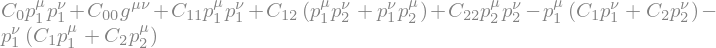

In [4]:
p1mu, p1nu, p2mu, p2nu = symbols(r'p_1^\mu p_1^\nu p_2^\mu p_2^\nu')
C00, C11, C12, C22 = symbols('C_{00} C_{11} C_{12} C_{22}')
C0, C1, C2 = symbols('C_0 C_1 C_2')
gmunu = symbols(r'g^{\mu\nu}')

Cmu = C1 * p1mu + C2 * p2mu
Cnu = C1 * p1nu + C2 * p2nu
ILTmu = -Cmu + p1mu * C0

Cmunu = C00 * gmunu + C11 * p1mu * p1nu + C12 * (p1mu * p2nu + p2mu * p1nu) + C22 * p2mu * p2nu
ILTmunu = Cmunu - p1nu*Cmu - p1mu*Cnu + p1mu*p1nu*C0
ILTmunu

In [5]:
Cmuprime = Cmu.subs(
    p1mu, -p1mu
).subs(
    p2mu, -p1mu -p2mu
).expand()
Cmuprime

In [6]:
ILTmu.expand()

In [7]:
for p in [p1mu, p2mu]:
    display(p)
    display(Cmuprime.coeff(p))
    display(ILTmu.expand().coeff(p))

As a consequence 
$$C_2^\prime = C_2$$
$$C_1^\prime =   C_1 - C_2 - C_0 $$

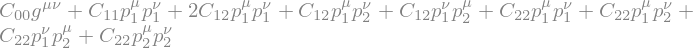

In [8]:
Cmunuprime = Cmunu.expand().subs(
    p1mu, -p1mu
).subs(
    p2mu, -p1mu -p2mu
).subs(
    p1nu, -p1nu
).subs(
    p2nu, -p1nu - p2nu
#).collect([p1mu, p1nu, p2mu, p2nu], lambda x:x.factor())    
).collect([p1mu*p1nu, p1mu*p2nu, p2mu*p1nu, p2mu*p2nu, gmunu], lambda x: x.factor())
Cmunuprime

In [9]:
for p in [p1mu, p2mu]:
    for q in [p1nu, p2nu]:
        display(p*q)
        display(Cmunuprime.coeff(p*q))
        display(ILTmunu.expand().coeff(p*q))

In [10]:
Cmunuprime.coeff(gmunu), ILTmunu.expand().coeff(gmunu)

As a consequence

$$C_{00}^\prime = C_{00}$$
$$C_{22}^\prime = C_{22}$$
$$C_{12}^\prime = - C_{22} - C_2 + C_{12} $$
$$
C_{11}^\prime + 2 C_{12}^\prime = -C_{22} + C_0 -2 C_1 + C_{11}\\
\to C_{11}^\prime = -2(C_{12} - C_{22} - C_2) - C_{22} + C_0 - 2 C_1 + C_{11}\\
\to C_{11}^\prime = -2 C_{12} + 2 C_{22} +2 C_2 - C_{22} + C_0 - 2 C_1 + C_{11}\\
\to C_{11}^\prime = -2 C_{12} + C_{22} +2 C_2  + C_0 - 2 C_1 + C_{11}\\
\to C_{11}^\prime = C_{22} +  C_0 + C_{11} - 2 C_{12} +2 C_2 - 2 C_1 \\
$$